# Build a multiple linear regression model for the prediction of demand for shared bikes

# Problem Statement :

A bike-sharing system is a service in which bikes are made available for shared use to individuals on a short term basis for a price or free. Many bike share systems allow people to borrow a bike from a "dock" which is usually computer-controlled wherein the user enters the payment information, and the system unlocks it. This bike can then be returned to another dock belonging to the same system.


A US bike-sharing provider BoomBikes has recently suffered considerable dips in their revenues due to the ongoing Corona pandemic. The company is finding it very difficult to sustain in the current market scenario. So, it has decided to come up with a mindful business plan to be able to accelerate its revenue as soon as the ongoing lockdown comes to an end, and the economy restores to a healthy state. 


In such an attempt, BoomBikes aspires to understand the demand for shared bikes among the people after this ongoing quarantine situation ends across the nation due to Covid-19. They have planned this to prepare themselves to cater to the people's needs once the situation gets better all around and stand out from other service providers and make huge profits.


They have contracted a consulting company to understand the factors on which the demand for these shared bikes depends. Specifically, they want to understand the factors affecting the demand for these shared bikes in the American market. The company wants to know:

- Which variables are significant in predicting the demand for shared bikes.
- How well those variables describe the bike demands

Based on various meteorological surveys and people's styles, the service provider firm has gathered a large dataset on daily bike demands across the American market based on some factors. 

### Business Goal:
You are required to model the demand for shared bikes with the available independent variables. It will be used by the management to understand how exactly the demands vary with different features. They can accordingly manipulate the business strategy to meet the demand levels and meet the customer's expectations. Further, the model will be a good way for management to understand the demand dynamics of a new market. 

### Data Preparation:

You can observe in the dataset that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them (as can be seen in the data dictionary). These numeric values associated with the labels may indicate that there is some order to them - which is actually not the case (Check the data dictionary and think why). So, it is advisable to convert such feature values into categorical string values before proceeding with model building. Please refer the data dictionary to get a better understanding of all the independent variables.
 

You might notice the column 'yr' with two values 0 and 1 indicating the years 2018 and 2019 respectively. At the first instinct, you might think it is a good idea to drop this column as it only has two values so it might not be a value-add to the model. But in reality, since these bike-sharing systems are slowly gaining popularity, the demand for these bikes is increasing every year proving that the column 'yr' might be a good variable for prediction. So think twice before dropping it. 
 

### Model Building

In the dataset provided, you will notice that there are three columns named 'casual', 'registered', and 'cnt'. The variable 'casual' indicates the number casual users who have made a rental. The variable 'registered' on the other hand shows the total number of registered users who have made a booking on a given day. Finally, the 'cnt' variable indicates the total number of bike rentals, including both casual and registered. The model should be built taking this 'cnt' as the target variable.

### Model Evaluation:
When you're done with model building and residual analysis and have made predictions on the test set, just make sure you use the following two lines of code to calculate the R-squared score on the test set.


from sklearn.metrics import r2_score<br>
r2_score(y_test, y_pred)
 

where y_test is the test data set for the target variable, and y_pred is the variable containing the predicted values of the target variable on the test set.
Please don't forget to perform this step as the R-squared score on the test set holds some marks. The variable names inside the 'r2_score' function can be different based on the variable names you have chosen.
 

### Submissions Expected:

- Python Notebook: One Python notebook with the whole linear model, predictions, and evaluation.
- Subjective Questions PDF: Apart from the Python notebook, you also need to answer some subjective questions related to linear regression which can be downloaded from the file below. Answer these questions and submit it as a PDF. 
- Note: There are some questions in the subjective questions doc that you might not be familiar with. So you're expected to research these questions and give an appropriate answer in order to expand your learnings of this topic.

----
# Reading and Understanding the data

In [44]:
#importing numpy, pandas

import numpy as np
import pandas as pd

# To supress warnings
import warnings
warnings.filterwarnings('ignore')

In [45]:
#notebook setting to display all the rowns and columns to have better clearity on the data.

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)

In [46]:
# reading the day.csv file and assiging a dataframe bike.

bike = pd.read_csv('day.csv')
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [47]:
# shape of the dataframe

bike.shape

(730, 16)

In [48]:
# bike information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [49]:
#checking numerical columns statistics

bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


**Insights:**
- **730 rows and 16 columns.**
- **from data dictionary we understood that:**
    - instant is just a record index, this column can be removed.
    - dteday is date column and we already have month and year columns in dataframe. thus we can drop dteday columnas it not bringing any new information.
    - addition of casual and registered columns gives cnt column, and we will not going to get much information from these columns, thus we wil drop these two as well.
- **there seems to be no missing values from non-null value count.**
- **TARGET variable/column is 'cnt'**

In [50]:
#checking all the columns
bike.columns

Index(['instant', 'dteday', 'season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday', 'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'casual', 'registered', 'cnt'], dtype='object')

In [51]:
# renaming columns for better visibility
bike.rename(columns={'season':'Season','yr':'Year','mnth':'Month','hum':'Humidity',
                     'weathersit':'Weather','cnt':'Count'}, inplace=True)

In [52]:
#checking new names
bike.head()

,instant,dteday,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,casual,registered,Count
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


-----
# Exploratory Data Anlysis

## Data Visualisation

### 1.1.1. Categorical Variables

In [53]:
#import libraries for visualization purpose

import matplotlib.pyplot as plt
import seaborn as sns

In [54]:
# creating new df by removing uneccessary/extra columns and assigning new dataframe bike_1 with remaining columns

nec_cols = ['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday', 'Weather', 'temp', 'atemp', 
            'Humidity', 'windspeed','Count']

bike_1 = bike[nec_cols]
bike_1.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600


**As observerd, all the columns are of numerical type, but from the data dictionary we see that there are some columns which represents categorical data as well.**
- **Binary Types : Year, holiday, workingday**
- **Categorical Types: Season, Month, weekday, Weather**
- **Numeric types: temp, atemp, Humidity, windspeed, Count**


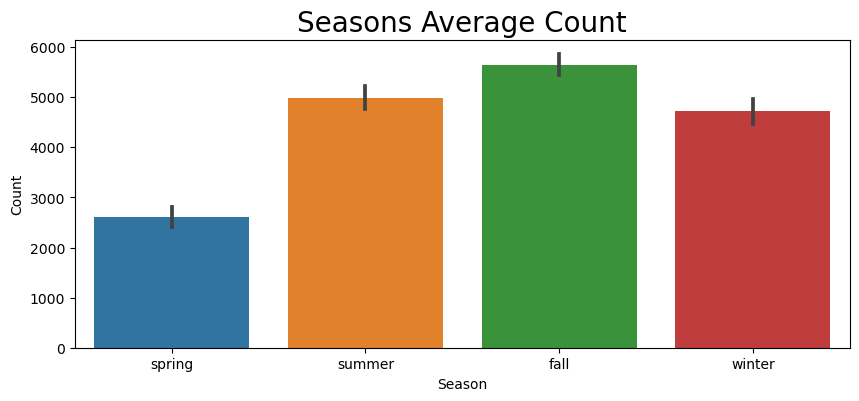

In [55]:
# mapping proper names for better visibilty
# season (1:spring, 2:summer, 3:fall, 4:winter)

bike_1['Season'] = bike_1['Season'].map({1:'spring',2:'summer',3:'fall',4:'winter'})


# Visualising Seasons count of rented bikes

plt.figure(figsize=[10,4])
sns.barplot(x=bike_1['Season'],y=bike_1['Count'])
plt.title('Seasons Average Count', fontsize = 20)
plt.show()

**Insights:**
- **In fall, there seems to be highest demand of rented the bikes, followed by Summer and Winter**
- **Spring seems to be the least season where people rent bikes**

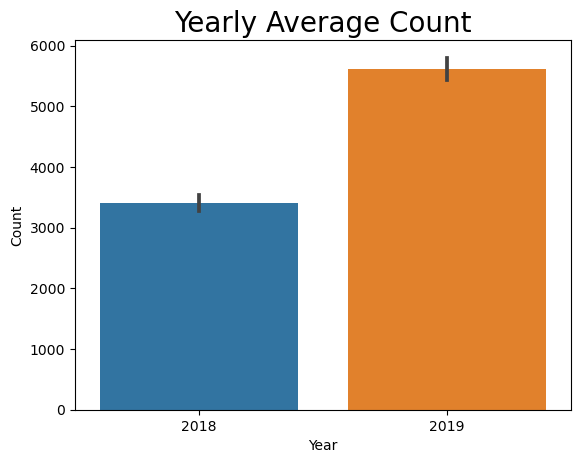

In [56]:
# mapping Year varible proper names for better visibilty

bike_1['Year'] = bike_1['Year'].map({0:'2018',1:'2019'})


# Visualising Yearly count of rented bikes

sns.barplot(x=bike_1['Year'],y=bike_1['Count'])
plt.title('Yearly Average Count', fontsize = 20)
plt.show()

**Insights:**
- **We can observe a trend here, average rented bikes has increased in 2019 almost double that of 2018**

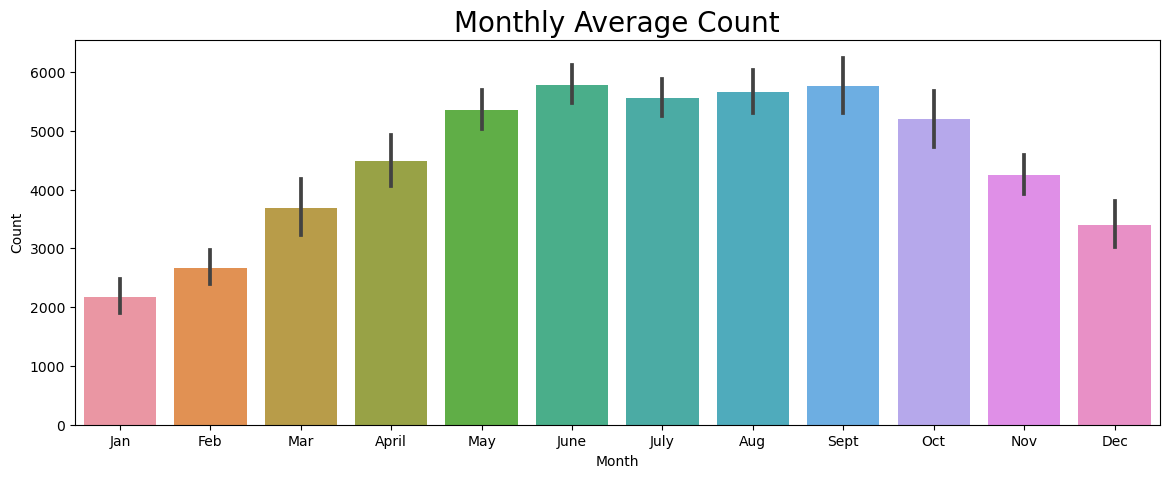

In [57]:
# mapping Month varible proper names for better visibilty

bike_1['Month'] = bike_1['Month'].map({1:'Jan',2:'Feb',3:'Mar',4:'April',
                                       5:'May',6:'June',7:'July',8:'Aug',
                                       9:'Sept',10:'Oct',11:'Nov',12:'Dec'})


# Visualising Monthly count of rented bikes

plt.figure(figsize=[14,5])
sns.barplot(x=bike_1['Month'],y=bike_1['Count'])
plt.title('Monthly Average Count', fontsize = 20)
plt.show()

**Insights:**
- **More and almost similar average count of rented bikes in August, June, September, July followed by May, October. Company should make sure they prepare with high availability during these months**
- **December, January, February have the least demand probably due to winter season**

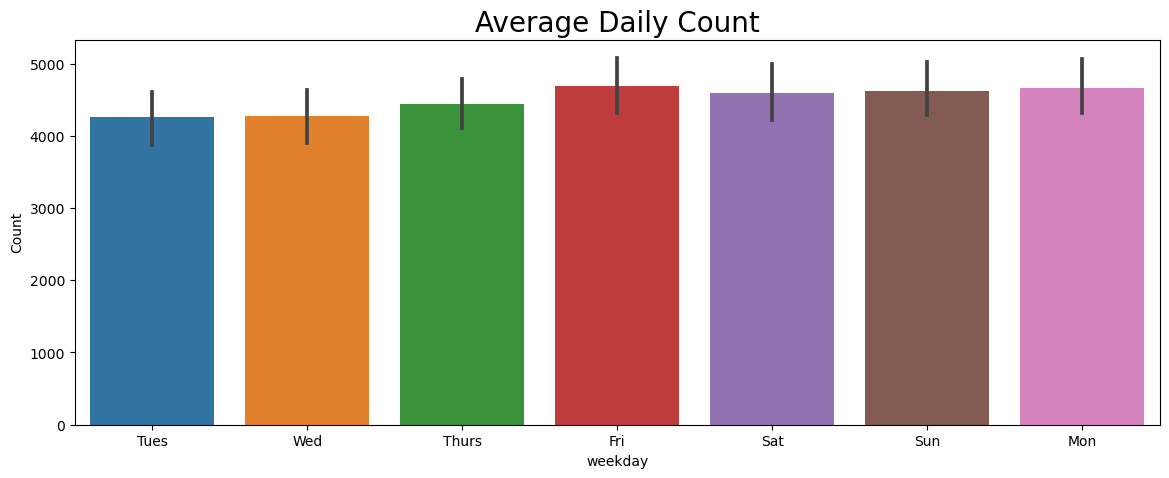

In [58]:
# mapping weekday variable proper names for better visibilty

bike_1['weekday'] = bike_1['weekday'].map({0:'Mon',1:'Tues',2:'Wed',3:'Thurs',4:'Fri',5:'Sat',6:'Sun'})

# Visualising Daily count of rented bikes

plt.figure(figsize=[14,5])
sns.barplot(x=bike_1['weekday'],y=bike_1['Count'])
plt.title('Average Daily Count', fontsize = 20)
plt.show()

**Insights:**
- **looks like all days have similar demands, but still Sunday, Monday, Saturday, Friday has high demands than other days**
- **People less prefer rented bike on Thrusday, Wednesday,Tuesday**

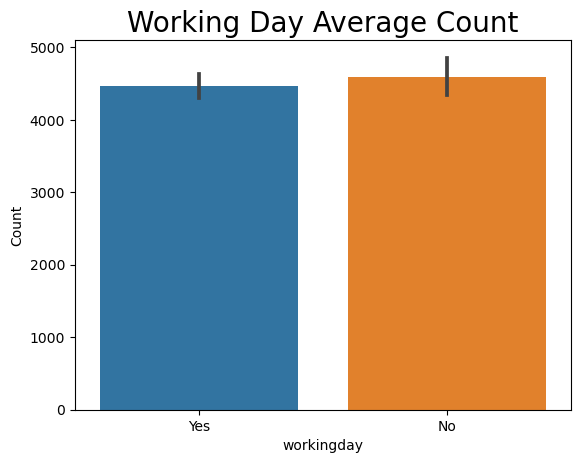

In [59]:
# mapping workingday varible proper names for better visibilty

bike_1['workingday'] = bike_1['workingday'].map({0:'No',1:'Yes'})

# Visualising Working day count of rented bikes

sns.barplot(x=bike_1['workingday'],y=bike_1['Count'])

plt.title('Working Day Average Count', fontsize = 20)
plt.show()

**Insights:**
- **There are similar demands whether it's a working day or not.**

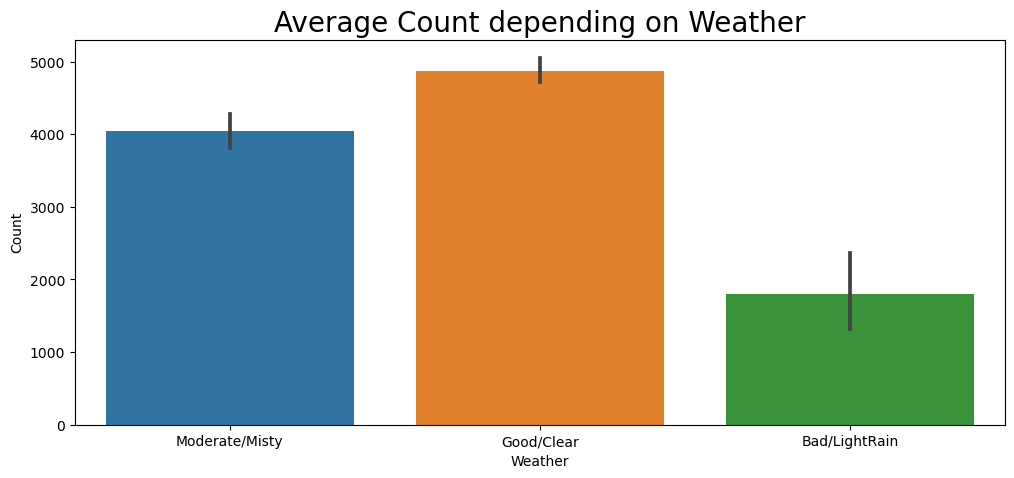

In [60]:
# mapping Weather varible proper names for better visibilty

#weathersit : 
# 1: Clear, Few clouds, Partly cloudy   = Good/Clear
# 2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist = Moderate/Mist
# 3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds  = Bad/Light Rain
# 4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog = Worse/Heavy Rain


bike_1['Weather'] = bike_1['Weather'].map({1:"Good/Clear",2:'Moderate/Misty',3:'Bad/LightRain',4:'Worse/HeavyRain'})


# Visualising Daily count of rented bikes

plt.figure(figsize=[12,5])
sns.barplot(x=bike_1['Weather'],y=bike_1['Count'])
plt.title('Average Count depending on Weather', fontsize = 20)
plt.show()

**Insights:**
- **It clearly shows that if the weather is clear, the demand is more**
- **If the weather is bad, demand decreases drastically**
- **Company should leverage and look up for forecast of weather to fullfill demands**

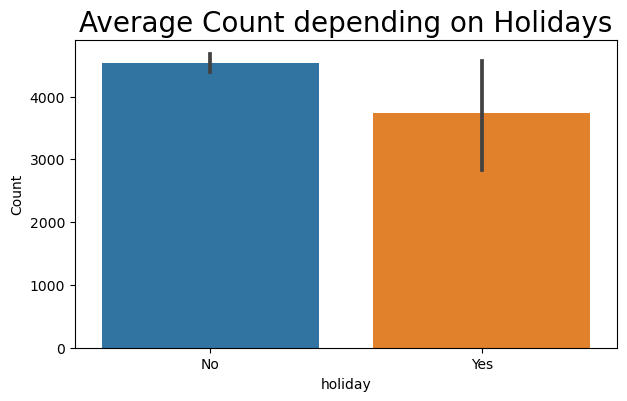

In [61]:
# mapping Holiday varible proper names for better visibilty

bike_1['holiday'] = bike_1['holiday'].map({0:'No',1:'Yes'})

# Visualising Holiday wise count of rented bikes

plt.figure(figsize=[7,4])
sns.barplot(x=bike_1['holiday'],y=bike_1['Count'])
plt.title('Average Count depending on Holidays', fontsize = 20)
plt.show()

**Insights:**
- **There is high decrease of demand if it is a holiday**

----
### 1.1.2. Numerical Variables

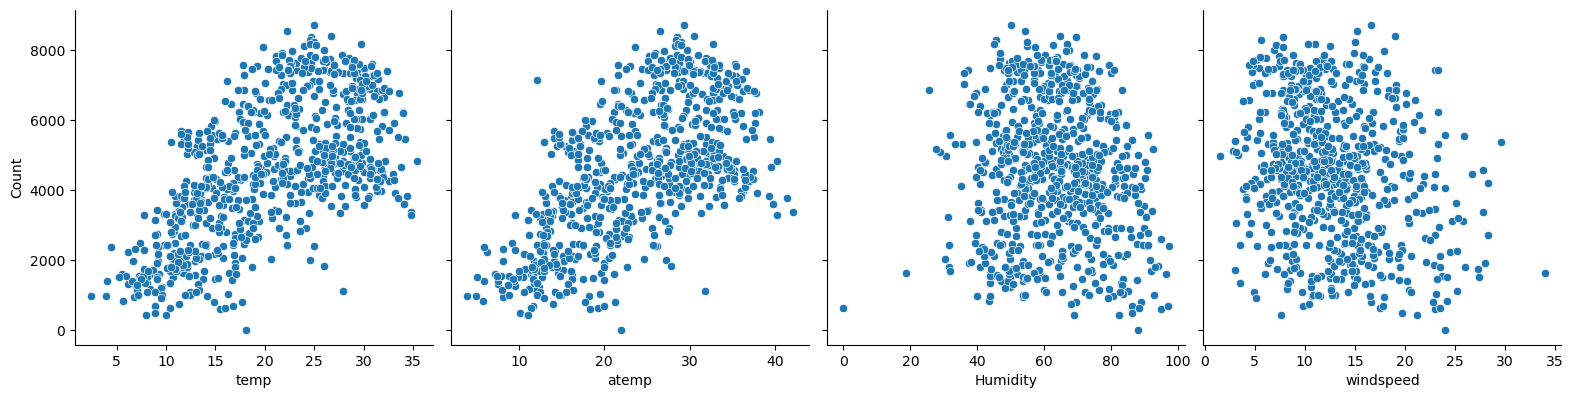

In [62]:
sns.pairplot(bike_1, x_vars=['temp','atemp','Humidity','windspeed'], y_vars='Count',size=4, aspect=1, kind='scatter', diag_kind = None)
plt.show()

**Insight:**
- **as can be seen from above plots, there is some linear relation between temp, atemp with Count.**
- **this shows that we can do linear regression for solving the problem.**

-----
**Independent variables which could be a good predictor from EDA are:**
- **temp**
- **Weather**
- **Months**
- **Seasons**
- **workingday**

---
# Data Preparation



In [63]:
# creating a list and putting all category columns in to it and converting them to category data type

cat = ['Season', 'Year', 'Month', 'holiday', 'weekday', 'workingday', 'Weather']

for i in cat:
    bike_1[i] = bike_1[i].astype('category')

In [64]:
# checking converted datatypes

bike_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   Season      730 non-null    category
 1   Year        730 non-null    category
 2   Month       730 non-null    category
 3   holiday     730 non-null    category
 4   weekday     730 non-null    category
 5   workingday  730 non-null    category
 6   Weather     730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   Humidity    730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  Count       730 non-null    int64   
dtypes: category(7), float64(4), int64(1)
memory usage: 35.1 KB


In [65]:
# for Linear model creating dummies

dummy = pd.get_dummies(bike_1[cat], drop_first=True)
dummy.head()

,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False
3,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False


In [66]:
# Combining both the dataframe, bike_1 and of dummy variables

bike_new = pd.concat([bike_1,dummy], axis=1)
bike_new.head()

,Season,Year,Month,holiday,weekday,workingday,Weather,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,spring,2018,Jan,No,Tues,Yes,Moderate/Misty,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1,spring,2018,Jan,No,Wed,Yes,Moderate/Misty,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,spring,2018,Jan,No,Thurs,Yes,Good/Clear,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False
3,spring,2018,Jan,No,Fri,Yes,Good/Clear,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,spring,2018,Jan,No,Sat,Yes,Good/Clear,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False


In [67]:
# dropping columns from which dummy varibles were created

bike_new.drop(cat, axis=1, inplace = True)

In [68]:
bike_new.head()

,temp,atemp,Humidity,windspeed,Count,Season_spring,Season_summer,Season_winter,Year_2019,Month_Aug,Month_Dec,Month_Feb,Month_Jan,Month_July,Month_June,Month_Mar,Month_May,Month_Nov,Month_Oct,Month_Sept,holiday_Yes,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thurs,weekday_Tues,weekday_Wed,workingday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
0,14.110847,18.18125,80.5833,10.749882,985,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,True,False,True,False,True
1,14.902598,17.68695,69.6087,16.652113,801,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False,True
2,8.050924,9.47025,43.7273,16.636703,1349,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,True,False,False,True,True,False
3,8.200000,10.60610,59.0435,10.739832,1562,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,True,False
4,9.305237,11.46350,43.6957,12.522300,1600,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,True,False,False,False,False,True,True,False


In [69]:
bike_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   temp                    730 non-null    float64
 1   atemp                   730 non-null    float64
 2   Humidity                730 non-null    float64
 3   windspeed               730 non-null    float64
 4   Count                   730 non-null    int64  
 5   Season_spring           730 non-null    bool   
 6   Season_summer           730 non-null    bool   
 7   Season_winter           730 non-null    bool   
 8   Year_2019               730 non-null    bool   
 9   Month_Aug               730 non-null    bool   
 10  Month_Dec               730 non-null    bool   
 11  Month_Feb               730 non-null    bool   
 12  Month_Jan               730 non-null    bool   
 13  Month_July              730 non-null    bool   
 14  Month_June              730 non-null    bo

- Now there are total of 30 columns, we will start model building now

## Train - Test Split

In [70]:
# importing statsmodel and sklearn libraries for Linear regression model building

import sklearn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split

In [71]:
# splitting the date into two train and test dataframes

df_train_bike_new, df_test_bike_new = train_test_split(bike_new, train_size=0.70, random_state=100)

In [72]:
# verify the columns and rows

print(df_train_bike_new.shape)
print(df_test_bike_new.shape)

(510, 30)
(220, 30)


## Rescaling the features

- using MinMax Scaler

In [73]:
# importing MinMax scaler from preprocessing module of sklearn library

from sklearn.preprocessing import MinMaxScaler

In [74]:
# defining a variable scaler for minmax scaling

scaler = MinMaxScaler()

In [75]:
bike_new.columns

Index(['temp', 'atemp', 'Humidity', 'windspeed', 'Count', 'Season_spring', 'Season_summer', 'Season_winter', 'Year_2019', 'Month_Aug', 'Month_Dec', 'Month_Feb', 'Month_Jan', 'Month_July', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Nov', 'Month_Oct', 'Month_Sept', 'holiday_Yes', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'workingday_Yes', 'Weather_Good/Clear', 'Weather_Moderate/Misty'], dtype='object')

In [76]:
# performing scaling on all the numericals variables of train dataset and leaving Count variable aside

num_vars = ['temp', 'atemp', 'Humidity', 'windspeed', 'Count']

df_train_bike_new[num_vars] = scaler.fit_transform(df_train_bike_new[num_vars])
df_train_bike_new[num_vars].head()

,temp,atemp,Humidity,windspeed,Count
576,0.815169,0.766351,0.725633,0.264686,0.827658
426,0.442393,0.438975,0.640189,0.255342,0.465255
728,0.245101,0.200348,0.498067,0.663106,0.204096
482,0.395666,0.391735,0.504508,0.188475,0.482973
111,0.345824,0.318819,0.751824,0.380981,0.191095


In [77]:
# checking all columns and all the variables after scaling
df_train_bike_new.describe()

,temp,atemp,Humidity,windspeed,Count
count,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.537440,0.513156,0.650480,0.320883,0.513499
std,0.225858,0.212410,0.145846,0.169803,0.224421
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.339853,0.332086,0.538643,0.199179,0.356420
50%,0.542596,0.529718,0.653714,0.296763,0.518638
75%,0.735215,0.688457,0.754830,0.414447,0.684710
max,1.000000,1.000000,1.000000,1.000000,1.000000


----
**Before start the training process we will plot a heat map to check multicollinearity**

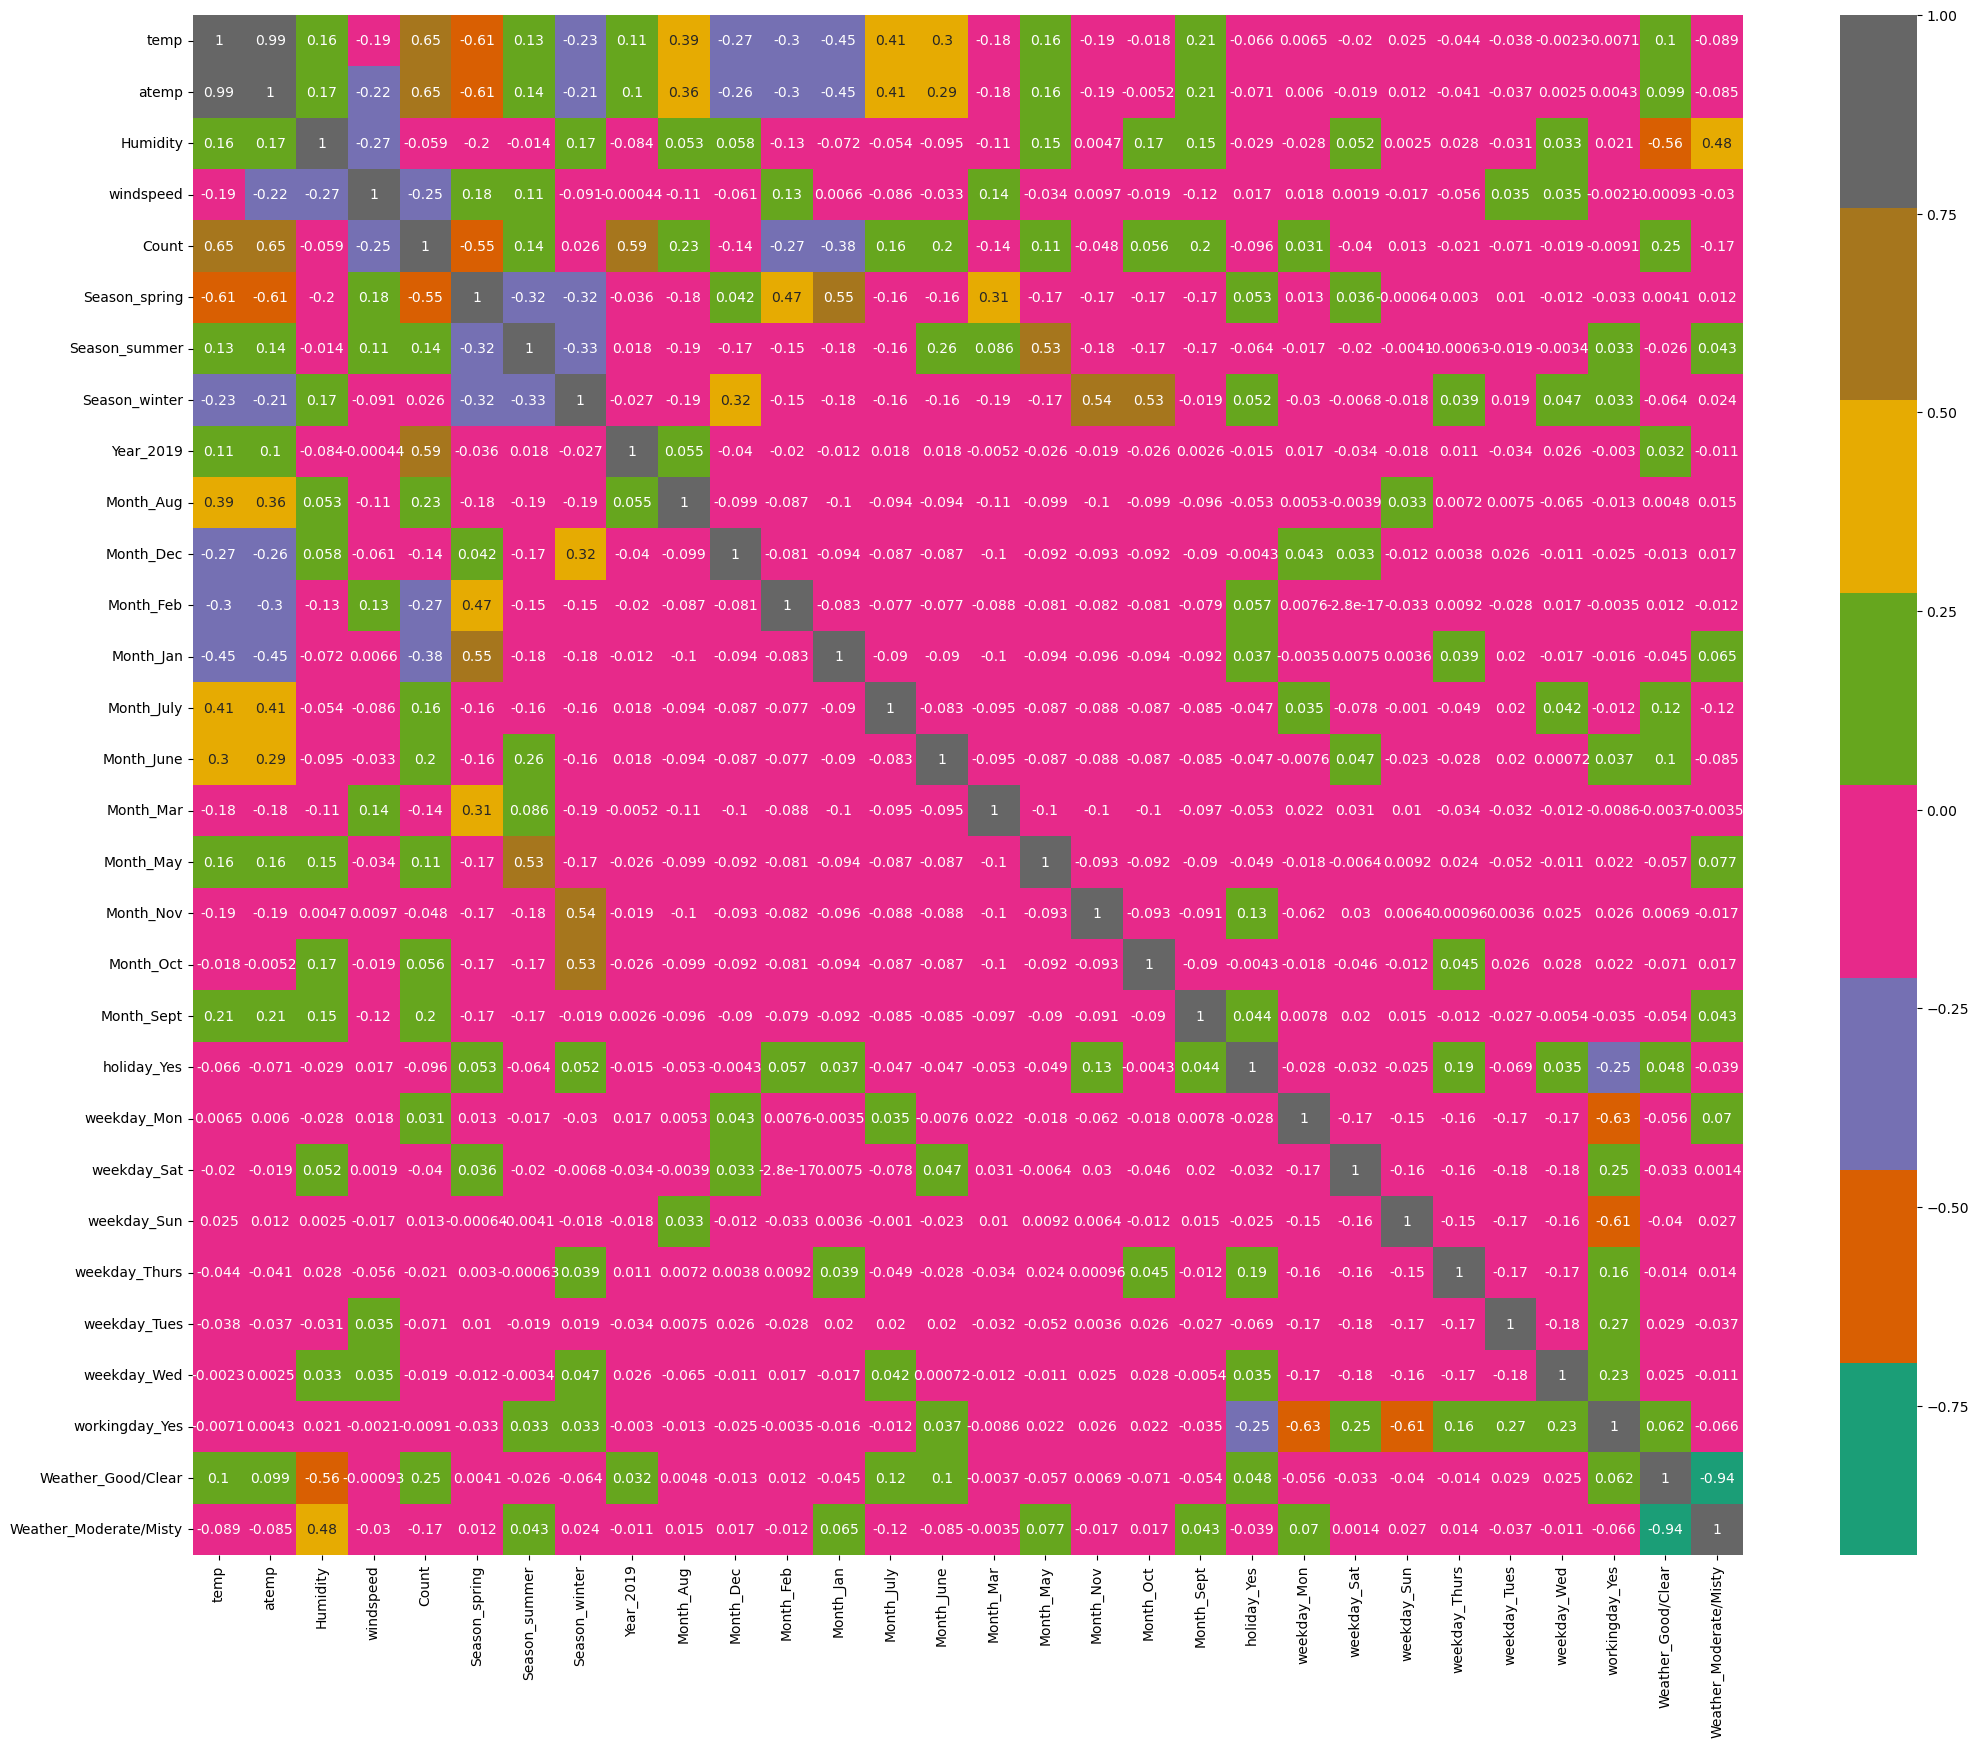

In [78]:
# Let's check the correlation coefficients to see which variables are highly correlated.

plt.figure(figsize = [25,20])
sns.heatmap(df_train_bike_new.corr(),annot =True, cmap= 'Dark2')
plt.show()

**INSIGHT:** - 
- The heatmap clearly shows which all variable are multicollinear in nature, and which variable have high collinearity with the target variable. 
- We will refer this map back-and-forth while building the linear model so as to validate different correlated values along with VIF & p-value, for identifying the correct variable to select/eliminate from the model.

# Model Building

In [79]:
# Dividing training set into X_train and y_train sets for the model building

y_train = df_train_bike_new.pop('Count')
X_train = df_train_bike_new

print(y_train.shape)
print(X_train.shape)

(510,)
(510, 29)


In [80]:
#importing RFE library for feature selection and after this will perform manual feature selection.

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [81]:
# using RFE for feature selection and  limiting to selecton to 15 features

lm = LinearRegression()
lm.fit(X_train, y_train)

rfe = RFE(estimator=lm, n_features_to_select=15)           # running RFE
rfe = rfe.fit(X_train, y_train)

In [82]:
#creating a list of features selected by RFE

list(zip(X_train, rfe.support_, rfe.ranking_))

[('temp', True, 1),
 ('atemp', False, 3),
 ('Humidity', True, 1),
 ('windspeed', True, 1),
 ('Season_spring', True, 1),
 ('Season_summer', True, 1),
 ('Season_winter', True, 1),
 ('Year_2019', True, 1),
 ('Month_Aug', False, 10),
 ('Month_Dec', True, 1),
 ('Month_Feb', False, 2),
 ('Month_Jan', True, 1),
 ('Month_July', True, 1),
 ('Month_June', False, 12),
 ('Month_Mar', False, 15),
 ('Month_May', False, 9),
 ('Month_Nov', True, 1),
 ('Month_Oct', False, 13),
 ('Month_Sept', True, 1),
 ('holiday_Yes', True, 1),
 ('weekday_Mon', False, 6),
 ('weekday_Sat', False, 14),
 ('weekday_Sun', False, 5),
 ('weekday_Thurs', False, 11),
 ('weekday_Tues', False, 8),
 ('weekday_Wed', False, 7),
 ('workingday_Yes', False, 4),
 ('Weather_Good/Clear', True, 1),
 ('Weather_Moderate/Misty', True, 1)]

In [83]:
#creating a list of features selected by RFE

rfe_col = X_train.columns[rfe.support_]
rfe_col

Index(['temp', 'Humidity', 'windspeed', 'Season_spring', 'Season_summer', 'Season_winter', 'Year_2019', 'Month_Dec', 'Month_Jan', 'Month_July', 'Month_Nov', 'Month_Sept', 'holiday_Yes', 'Weather_Good/Clear', 'Weather_Moderate/Misty'], dtype='object')

In [84]:
# feature which are chosen by RFE during feature selection( so un-supported columns)

X_train.columns[~rfe.support_]

Index(['atemp', 'Month_Aug', 'Month_Feb', 'Month_June', 'Month_Mar', 'Month_May', 'Month_Oct', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun', 'weekday_Thurs', 'weekday_Tues', 'weekday_Wed', 'workingday_Yes'], dtype='object')

In [85]:
# Creating new train dataframe with RFE selected features

X_train_rfe = X_train[rfe_col]
X_train_rfe.head()

,temp,Humidity,windspeed,Season_spring,Season_summer,Season_winter,Year_2019,Month_Dec,Month_Jan,Month_July,Month_Nov,Month_Sept,holiday_Yes,Weather_Good/Clear,Weather_Moderate/Misty
576,0.815169,0.725633,0.264686,False,False,False,True,False,False,True,False,False,False,True,False
426,0.442393,0.640189,0.255342,True,False,False,True,False,False,False,False,False,False,False,True
728,0.245101,0.498067,0.663106,True,False,False,True,True,False,False,False,False,False,True,False
482,0.395666,0.504508,0.188475,False,True,False,True,False,False,False,False,False,False,False,True
111,0.345824,0.751824,0.380981,False,True,False,False,False,False,False,False,False,False,False,True


### Model 1

In [92]:
import statsmodels.api as sm
import pandas as pd
import numpy as np
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Step 1: Generate sample data (you should replace this with your actual data)
X, y = make_regression(n_samples=100, n_features=5, noise=0.1)
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 2: Add a constant (intercept) to the model
X_train_lm1 = sm.add_constant(X_train_rfe)

# Step 3: Fit the model
lr1 = sm.OLS(y_train, X_train_lm1).fit()

# Step 4: Display the summary
print(lr1.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 3.515e+07
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          2.24e-234
Time:                        22:00:55   Log-Likelihood:                 76.865
No. Observations:                  80   AIC:                            -141.7
Df Residuals:                      74   BIC:                            -127.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0180      0.011     -1.605      0.1

In [94]:
import pandas as pd
import numpy as np
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_regression(n_samples=100, n_features=5, noise=0.1)
feature_names = [f'Feature_{i}' for i in range(X.shape[1])]
X_train_rfe, X_test_rfe, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convert to DataFrame
X_train_rfe = pd.DataFrame(X_train_rfe, columns=feature_names)

# Calculate VIF
vif = pd.DataFrame()
vif['Features'] = X_train_rfe.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by="VIF", ascending=False)

print(vif)



    Features   VIF
2  Feature_2  1.05
0  Feature_0  1.04
1  Feature_1  1.04
3  Feature_3  1.03
4  Feature_4  1.03


-----
### Model 2


- removing feature - Humidity due very high VIF values as all the p-values < 0.05.


In [98]:
import statsmodels.api as sm
import pandas as pd

# Assuming X_train_rfe and y_train are already defined and preprocessed

# Step 1: Verify the Columns
print("Columns in X_train_rfe:", X_train_rfe.columns)

# Step 2: Drop the Column and Check Shape
if 'Humidity' in X_train_rfe.columns:
    X_train_rfe2 = X_train_rfe.drop('Humidity', axis=1)
    print("Dropped 'Humidity'. New shape:", X_train_rfe2.shape)
else:
    print("'Humidity' not found in the columns.")
    X_train_rfe2 = X_train_rfe  # Proceed without dropping if not found

# Step 3: Add Constant and Fit the Model
X_train_lm2 = sm.add_constant(X_train_rfe2)
lr2 = sm.OLS(y_train, X_train_lm2).fit()
print(lr2.summary())



Columns in X_train_rfe: Index(['Feature_0', 'Feature_1', 'Feature_2', 'Feature_3', 'Feature_4'], dtype='object')
'Humidity' not found in the columns.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.771e+07
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.49e-230
Time:                        22:03:08   Log-Likelihood:                 68.692
No. Observations:                  80   AIC:                            -125.4
Df Residuals:                      74   BIC:                            -111.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      

In [99]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe2.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
2,Feature_2,1.05
0,Feature_0,1.04
1,Feature_1,1.04
3,Feature_3,1.03
4,Feature_4,1.03


-----
### Model 3
- removing feature - 'Weather_Moderate/Misty' due very high VIF values as all the p-values < 0.05. even temp and Weather_Good/Clear has value way higher VIF but from data dictionary and EDA we get that they play a major role in the demand of bikes. thus we are retaining them as of now.

In [101]:
import statsmodels.api as sm
import pandas as pd

# Assuming X_train_rfe and y_train are already defined and preprocessed

# Step 1: Drop 'Humidity' column if it exists
if 'Humidity' in X_train_rfe.columns:
    X_train_rfe2 = X_train_rfe.drop('Humidity', axis=1)
    print("Dropped 'Humidity'. New shape:", X_train_rfe2.shape)
else:
    print("'Humidity' not found in the columns.")
    X_train_rfe2 = X_train_rfe  # Proceed without dropping if not found

# Step 2: Drop 'Weather_Moderate/Misty' column if it exists
if 'Weather_Moderate/Misty' in X_train_rfe2.columns:
    X_train_rfe3 = X_train_rfe2.drop('Weather_Moderate/Misty', axis=1)
    print("Dropped 'Weather_Moderate/Misty'. New shape:", X_train_rfe3.shape)
else:
    print("'Weather_Moderate/Misty' not found in the columns.")
    X_train_rfe3 = X_train_rfe2  # Proceed without dropping if not found

# Step 3: Add a constant (intercept) to the updated feature matrix
X_train_lm3 = sm.add_constant(X_train_rfe3)

# Step 4: Fit the new linear regression model
lr3 = sm.OLS(y_train, X_train_lm3).fit()

# Step 5: Display the summary of the new model
print(lr3.summary())


'Humidity' not found in the columns.
'Weather_Moderate/Misty' not found in the columns.
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.771e+07
Date:                Tue, 02 Jul 2024   Prob (F-statistic):          1.49e-230
Time:                        22:07:48   Log-Likelihood:                 68.692
No. Observations:                  80   AIC:                            -125.4
Df Residuals:                      74   BIC:                            -111.1
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------

In [ ]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe3.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe3.values, i) for i in range(X_train_rfe3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

-----
### Model 4
- removing feature - 'Month_Nov' coz high p-values(0.148).

In [ ]:
X_train_rfe4 = X_train_rfe3.drop('Month_Nov', axis = 1)

# Add a constant
X_train_lm4 = sm.add_constant(X_train_rfe4)

# Create a first fitted model
lr4 = sm.OLS(y_train, X_train_lm4).fit()

lr4.summary()

In [ ]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe4.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe4.values, i) for i in range(X_train_rfe4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

-----
### Model 5

- removing feature - 'Month_Dec' coz of high p-values(0.231).

In [ ]:
X_train_rfe5 = X_train_rfe4.drop('Month_Dec', axis = 1)

# Add a constant
X_train_lm5 = sm.add_constant(X_train_rfe5)

# Create a first fitted model
lr5 = sm.OLS(y_train, X_train_lm5).fit()

lr5.summary()

In [ ]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe5.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe5.values, i) for i in range(X_train_rfe5.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

-----
### Model 6

- removing feature - 'Month_Jan' coz of high p-values(0.089).

In [ ]:
X_train_rfe6 = X_train_rfe5.drop('Month_Jan', axis = 1)

# Add a constant
X_train_lm6 = sm.add_constant(X_train_rfe6)

# Create a first fitted model
lr6 = sm.OLS(y_train, X_train_lm6).fit()

lr6.summary()

In [ ]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe6.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe6.values, i) for i in range(X_train_rfe6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

-----
### Model 7
- removing feature - 'Month_July' coz of high collinearity with temp variable.
- even hum and temp VIF values are high but from data dictionary we get that it plays a major role of humidity and temperature, thus we will retain them.

In [ ]:
X_train_rfe7 = X_train_rfe6.drop('Month_July', axis = 1)

# Add a constant
X_train_lm7 = sm.add_constant(X_train_rfe7)

# Create a first fitted model
lr7 = sm.OLS(y_train, X_train_lm7).fit()

lr7.summary()

In [ ]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe7.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe7.values, i) for i in range(X_train_rfe7.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

-----
### Model 8
- removing feature - 'Season_spring' coz of high negative collinearity with temp variable.

In [ ]:
X_train_rfe8 = X_train_rfe7.drop('Season_spring', axis = 1)

# Add a constant
X_train_lm8 = sm.add_constant(X_train_rfe8)

# Create a first fitted model
lr8 = sm.OLS(y_train, X_train_lm8).fit()

lr8.summary()

In [ ]:
# Check for the VIF values of the feature variables. 

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train_rfe8.columns
vif['VIF'] = [variance_inflation_factor(X_train_rfe8.values, i) for i in range(X_train_rfe8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

---
**This model looks good, as there seems to be VERY LOW Multicollinearity between the predictors and the p-values for all the predictors seems to be significant. For now, we will consider this as our final model (unless the Test data metrics are not significantly close to this number).**


### Final Model Interpretation
- **Hypothesis Testing:**
    - Hypothesis testing states that:
        - H0:B1=B2=...=Bn=0 
        - H1:  at least one  Bi!=0 
        

**Model 8  coefficient values**

- const	       	=		0.0417	
- temp	      	=		0.5428	
- windspeed	  	=		-0.1756	
- Season_summer	=		0.0903	
- Season_winter	=		0.1205	
- Year_2019		=		0.2366	
- Month_Sept		=		0.0978	
- holiday_Yes		=		-0.0928	
- Weather_Good/Clear	=	0.0939	


**INSIGHT:  From the Model 8 model summary, it is evident that all our coefficients are not equal to zero. which means We REJECT the NULL HYPOTHESIS**

**F Statistics** : F-Statistics is used for testing the overall significance of the Model: Higher the F-Statistics, more significant the Model is.

- F-statistic: 264.2
- Prob (F-statistic): 2.45e-174

**The F-Statistics value of 264.2 (which is greater than 1) and the p-value of '~0.0000' states that the overall model is significant**

### The equation for best fitted line based on Model 8:


$Count = 0.0417 + (temp * 0.5428) - (windspeed * 0.1756) + (Season summer * 0.0903) + (Season winter * 0.1205) + (Year 2019 * 0.2366) + (Month Sept * 0.0978) - (holiday Yes * 0.0928) + (Weather Good/Clear * 0.0939)$

### Interpretation of Coefficients:

- **const**: The Constant value of ‘0.0417’ indicated that, in the absence of all other predictor variables (i.e. when x1,x2...xn =0), The bike demand still increases by 0.0417 units.

- **𝑡𝑒𝑚𝑝**: A coefficient value of ‘0.5428’ indicate a unit increase in temp variable, increases the bike demand by 0.5428 units.

- **𝑤𝑖𝑛𝑑𝑠𝑝𝑒𝑒𝑑**: A coefficient value of ‘-0.1756’ indicate a unit decrease in windspeed variable, decreases bike demand by 0.1756 units.

- **𝑆𝑒𝑎𝑠𝑜𝑛_𝑠𝑢𝑚𝑚𝑒𝑟**: A coefficient value of ‘0.0903’ indicate a unit increase in Season_summer variable, increases bike demand by 0.0903 units.

- **𝑆𝑒𝑎𝑠𝑜𝑛_𝑤𝑖𝑛𝑡𝑒𝑟**: A coefficient value of ‘0.1205’ indicate a unit increase in Season_winter variable, increases bike demand by 0.1205 units.

- **𝑌𝑒𝑎𝑟_2019**: A coefficient value of ‘0.2366’ indicate a unit increase in Year_2019 variable, increases the bike demand by 0.2366 units.

- **𝑀𝑜𝑛𝑡ℎ_𝑆𝑒𝑝𝑡**: A coefficient value of ‘0.0978’ indicate a unit increase in Month_Sept variable, increases the bike demand by 0.0978 units.

- **ℎ𝑜𝑙𝑖𝑑𝑎𝑦_𝑌𝑒𝑠**: A coefficient value of ‘-0.0928’ indicate a unit decrease in holiday_Yes variable, decreases bike demand by 0.0928 units.

- **𝑊𝑒𝑎𝑡ℎ𝑒𝑟_𝐺𝑜𝑜𝑑/𝐶𝑙𝑒𝑎𝑟**: A coefficient value of ‘0.0939’ indicate a unit increase if the weather is good, increases the bike demand by 0.0939 units.

## VALIDATE ASSUMPTIONS
### Error terms are normally distributed with mean zero (not X, Y)
### Residual Analysis Of Training Data

In [ ]:
y_train_pred = lr8.predict(X_train_lm8)

In [ ]:
# residual calculations
res = y_train - y_train_pred

# Plot the histogram of the error terms

fig = plt.figure(figsize=[7,5])
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 20)        # Plot heading 
plt.xlabel('Errors', fontsize = 18)
plt.show()

**INSIGHT:** - From the above histogram, we could see that the Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

### Check for Homoscedasticity

In [ ]:
# Check for Homoscedasticity
plt.figure(figsize = [8,5])
p = sns.scatterplot(y_train_pred,res)
plt.xlabel('y_pred/predicted values')
plt.ylabel('Residuals')

p = sns.lineplot([0,1],[0,0],color='red')
p = plt.title('Residuals vs fitted values plot for homoscedasticity check', fontsize = 20)

**INSIGHT:** - From the above plot, we can see that residuals have equal or almost equal variance across the regression line.

### MAKING PREDICTION USING FINAL MODEL
Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (Model 8)

**Applying the scaling on the test sets**
- We will only use **scaler.transform**, as we want to use the metrics that model learned from the training data to be applied on the test data.

In [ ]:
# Apply scaler() to all numeric variables in test dataset. 

df_test_bike_new[num_vars] = scaler.transform(df_test_bike_new[num_vars])
df_test_bike_new.head()

In [ ]:
# variables after scaling the test data
df_test_bike_new.describe()

In [ ]:
# Dividing test set into X_test and y_test sets for the model building

y_test = df_test_bike_new.pop('Count')
X_test = df_test_bike_new

print(y_test.shape)
print(X_test.shape)

In [ ]:
#Selecting the variables that were part of final model (Model 8).
col_test = X_train_rfe8.columns

X_test = X_test[col_test]

# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)

X_test_lm8.head()

In [ ]:
# Making predictions using the final model (lr8)

y_test_pred = lr8.predict(X_test_lm8)

### Model Evaluation

In [ ]:
# Plotting y_test and y_test_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred, alpha=.5)
fig.suptitle('y_test vs y_test_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_test_pred', fontsize = 16) 

**We can see there is linear relationship between y_test and y_test_pred**

---
### Residaul Analysis

In [ ]:
from sklearn.metrics import r2_score

r2_test = r2_score(y_test, y_test_pred)
r2_train = r2_score(y_train, y_train_pred)

print('Test data r^2 :',round((r2_test*100),2))
print('Train data r^2 :',round((r2_train*100),2))

### Adjusted R^2 Value for TEST

$Adj r2 = 1-(1-R2)*(n-1)/(n-p-1)$

In [ ]:
# n for test data ,n1 for train data is number of rows
n = X_test.shape[0]
n1 = X_train_rfe8.shape[0]

# Number of features (predictors, p for test data, p1 for train data) is the number of columns
p = X_test.shape[1]
p1 = X_train_rfe8.shape[1]


# We find the Adjusted R-squared using the formula

adjusted_r2_test = 1-(1-r2_test)*(n-1)/(n-p-1)
adjusted_r2_train = 1-(1-r2_train)*(n1-1)/(n1-p1-1)

print('Test data adjusted r^2 :',round((adjusted_r2_test*100),2))
print('Train data adjusted r^2 :',round((adjusted_r2_train*100),2))

## FINAL RESULT COMPARISON: 
- Test data r^2 : 78.32
- Train data r^2 : 80.84

- Test data adjusted r^2 : 77.5
- Train data adjusted r^2 : 80.53

This seems to be a really good model that can very well 'Generalize' various datasets. 

**As per our final Model, the below predictor variables influences bike booking :**
- Temperature (temp)
- September Month 
- Year -2019
- Summer Seaon
- Winter Seson
- If its a holiday
- If the weather is clear/Good
- Speed of the Wind